In [3]:
import pandas as pd
import numpy as np

In [4]:
dataset=pd.read_csv("cleaned_naveen.csv")

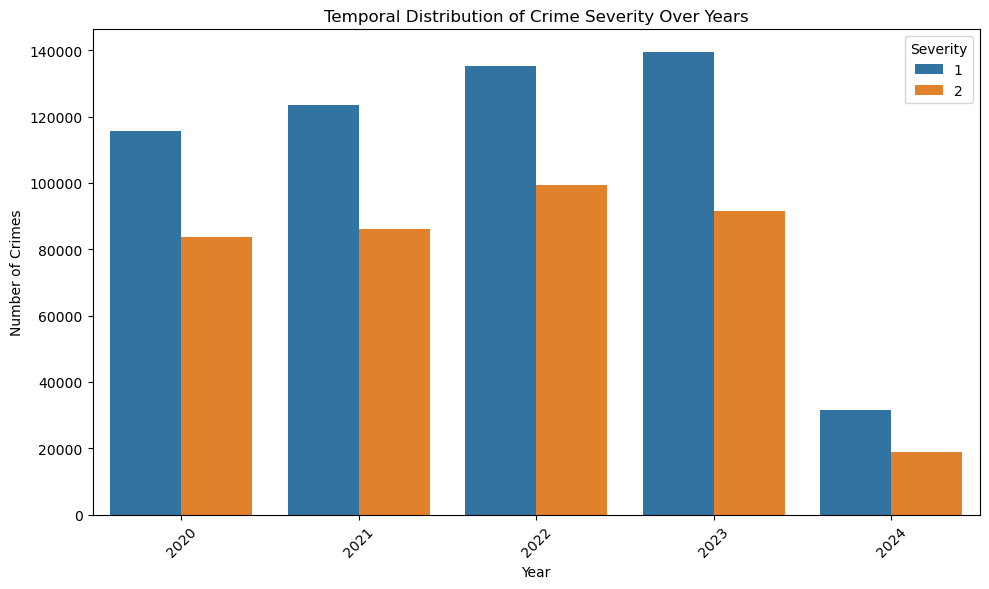

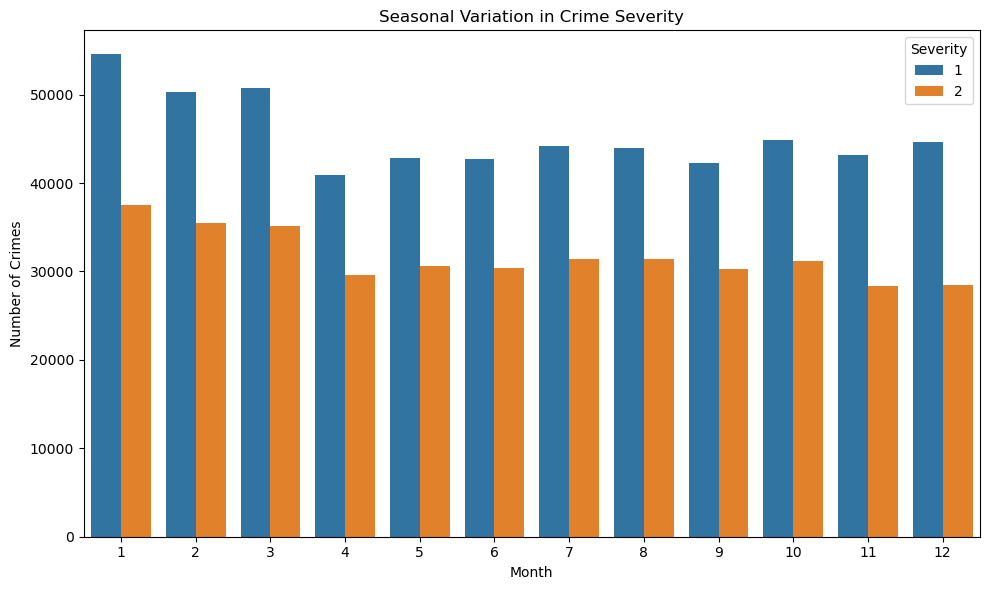

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
crime_data = dataset# Replace "crime_data.csv" with the actual file path

# Convert 'DATE OCC' column to datetime format
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# Extract year and month from the 'DATE OCC' column
crime_data['Year'] = crime_data['DATE OCC'].dt.year
crime_data['Month'] = crime_data['DATE OCC'].dt.month

# Plotting the temporal distribution of crime severity over years
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', hue='Part 1-2', data=crime_data)
plt.title('Temporal Distribution of Crime Severity Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the distribution of crime severity across different months
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='Part 1-2', data=crime_data)
plt.title('Seasonal Variation in Crime Severity')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()


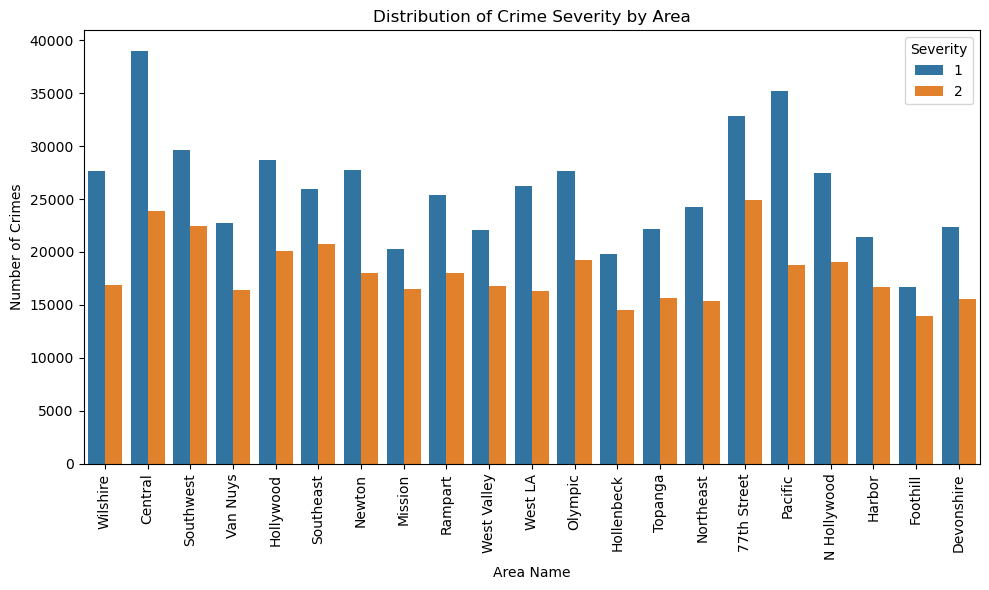

In [4]:
# Plotting the distribution of crime severity by area
plt.figure(figsize=(10, 6))
sns.countplot(x='AREA NAME', hue='Part 1-2', data=crime_data)
plt.title('Distribution of Crime Severity by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.legend(title='Severity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [5]:
dataset['LOCATION'] = dataset['LOCATION'].str.replace(r'\s+', ' ', regex=True)

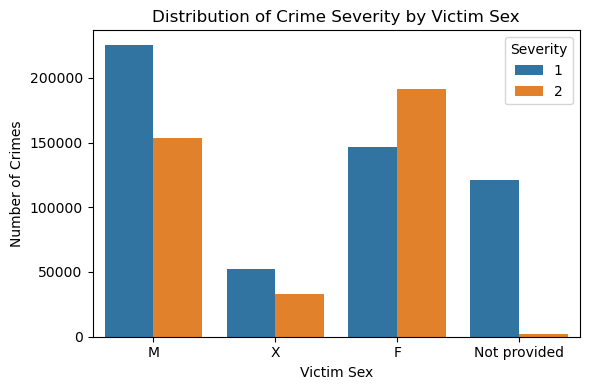

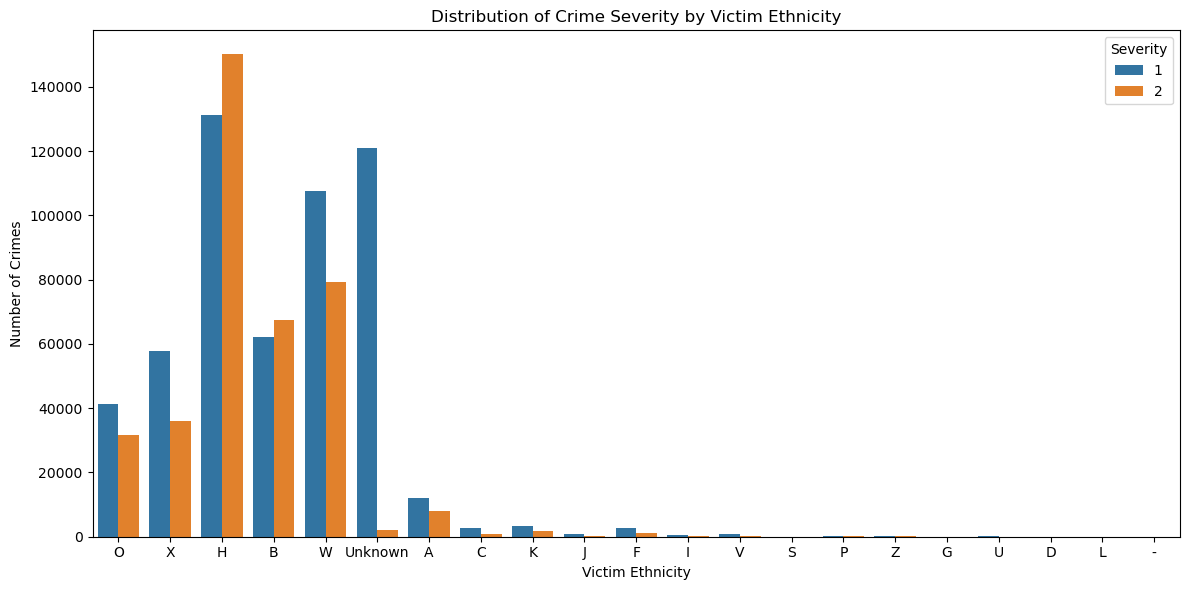

In [6]:

# Plotting the distribution of crime severity by victim sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Vict Sex', hue='Part 1-2', data=dataset)
plt.title('Distribution of Crime Severity by Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Number of Crimes')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

# Plotting the distribution of crime severity by victim ethnicity
plt.figure(figsize=(12, 6))
sns.countplot(x='Vict Descent', hue='Part 1-2', data=dataset)
plt.title('Distribution of Crime Severity by Victim Ethnicity')
plt.xlabel('Victim Ethnicity')
plt.ylabel('Number of Crimes')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()


In [7]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder object
label_encoder = LabelEncoder()

# Encode 'Vict Sex' into numerical values
dataset['Vict Sex Numerical'] = label_encoder.fit_transform(dataset['Vict Sex'])

letter_to_number = {
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10,
    'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19,
    'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, 'Unknown':27, '-':27
}

# Encode 'Vict Descent' into numerical values based on the mapping
dataset['Vict Descent Numerical'] = dataset['Vict Descent'].map(letter_to_number)

# Display the unique numerical values assigned to each category
print("Unique numerical values for 'Vict Sex':", dataset['Vict Sex Numerical'].unique())
print("Unique numerical values for 'Vict Descent':", dataset['Vict Descent Numerical'].unique())


Unique numerical values for 'Vict Sex': [1 3 0 2]
Unique numerical values for 'Vict Descent': [15 24  8  2 23 27  1  3 11 10  6  9 22 19 16 26  7 21  4 12]


In [8]:
dataset[dataset['Vict Descent Numerical'].isna()]

,Unnamed: 0.1,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,...,Cross Street,LAT,LON,Day of Week,Age Group,Month,Crime Type,Year,Vict Sex Numerical,Vict Descent Numerical


In [9]:
dataset['Vict Age'].unique()

array([  0,  47,  19,  28,  41,  25,  27,  24,  26,   8,   7,  13,  56,
        22,  23,  31,  30,  57,  12,  46,  51,  37,  20,  29,  33,  34,
        15,  65,  59,   9,  35,  -2,  50,  64,  79,  40,  44,  32,  16,
        21,  42,   6,  72,  10,  60,  36,  18,  17,   5,  39,  62,  58,
        63,  14,  71,  69,  49,  38,  61,  43,  45,  78,  67,  53,  54,
        11,  48,  73,  52,  68,  81,  80,   3,  55,  89,  70,  77,  83,
        91,  82,  75,  76,  74,  -1,   4,   2,  66,  84,  -3,  87,  86,
        85,  90,  99,  96,  88,  92,  94,  93,  95,  97,  98, 120,  -4],
      dtype=int64)

In [10]:
# Count the number of rows where victim age is less than 0
num_negative_age = len(dataset[dataset['Vict Age'] < 0])

# Print the result
print("Number of rows where victim age is less than 0:", num_negative_age)


Number of rows where victim age is less than 0: 112


In [6]:
# Drop the rows where victim age is less than 0
dataset = dataset[dataset['Vict Age'] >= 0]

# Display the updated dataset shape
print("Updated dataset shape after dropping rows with negative victim age:", dataset.shape)


Updated dataset shape after dropping rows with negative victim age: (924899, 31)


In [12]:
dataset.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'DR_NO', 'Date Rptd', 'DATE OCC',
       'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd',
       'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent',
       'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status',
       'Status Desc', 'Crm Cd 1', 'LOCATION', 'Cross Street', 'LAT', 'LON',
       'Day of Week', 'Age Group', 'Month', 'Crime Type', 'Year',
       'Vict Sex Numerical', 'Vict Descent Numerical'],
      dtype='object')

In [13]:
dataset

,Unnamed: 0.1,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,...,Cross Street,LAT,LON,Day of Week,Age Group,Month,Crime Type,Year,Vict Sex Numerical,Vict Descent Numerical
0,0,0,190326475,2020-03-01,2020-03-01,21:30,7,Wilshire,784,1,...,Unknown,34.0375,-118.3506,Sunday,0-9,3,VEHICLE - STOLEN,2020,1,15
1,1,1,200106753,2020-02-09,2020-02-08,18:00,1,Central,182,1,...,Unknown,34.0444,-118.2628,Sunday,40-49,2,BURGLARY FROM VEHICLE,2020,1,15
2,2,2,200320258,2020-11-11,2020-11-04,17:00,3,Southwest,356,1,...,Unknown,34.0210,-118.3002,Wednesday,10-19,11,BIKE - STOLEN,2020,3,24
3,3,3,200907217,2023-05-10,2020-03-10,20:37,9,Van Nuys,964,1,...,Unknown,34.1576,-118.4387,Wednesday,10-19,3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2020,1,15
4,4,4,220614831,2022-08-18,2020-08-17,12:00,6,Hollywood,666,2,...,Unknown,34.0944,-118.3277,Thursday,20-29,8,THEFT OF IDENTITY,2020,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925006,925038,925038,241605270,2024-02-11,2024-02-11,19:20,16,Foothill,1681,2,...,Unknown,34.2278,-118.4051,Sunday,70-79,2,TRESPASSING,2024,1,15
925007,925039,925039,241604405,2024-01-14,2024-01-13,07:20,16,Foothill,1673,1,...,Unknown,34.2271,-118.3878,Sunday,30-39,1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2024,1,8
925008,925040,925040,242106032,2024-02-20,2024-02-17,23:30,21,Topanga,2103,1,...,Unknown,34.2260,-118.6214,Tuesday,40-49,2,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),2024,0,15
925009,925041,925041,242004546,2024-01-16,2024-01-16,15:10,20,Olympic,2013,2,...,3RD ST,34.0690,-118.3054,Tuesday,80-89,1,BATTERY - SIMPLE ASSAULT,2024,0,15


In [7]:
dataset['Weapon Used Cd'] = dataset['Weapon Used Cd'].replace('Not provided',100)
dataset['Weapon Used Cd'] = dataset['Weapon Used Cd'].astype(float)

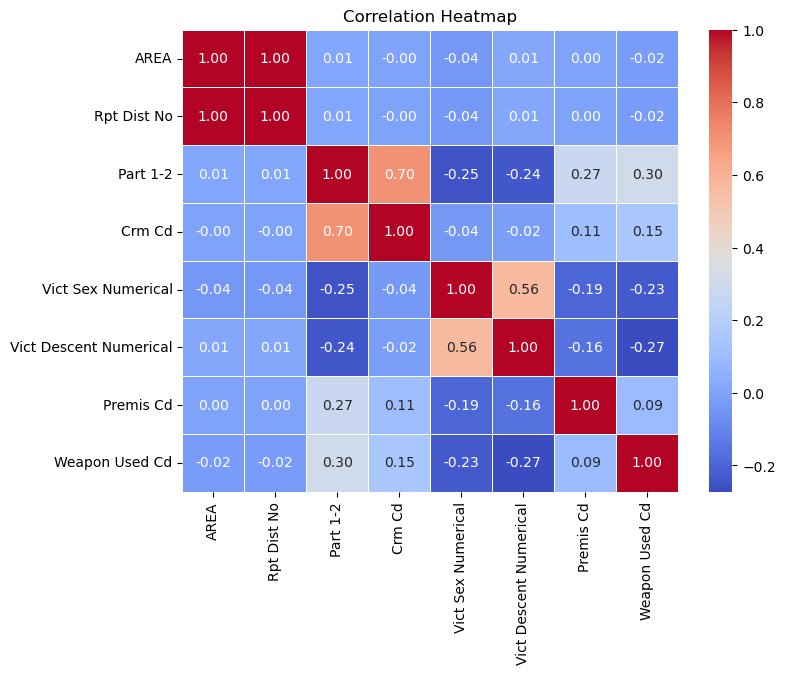

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for heatmap
columns_for_heatmap = ['AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Vict Sex Numerical', 'Vict Descent Numerical', 'Premis Cd', 'Weapon Used Cd']

# Calculate the correlation matrix
correlation_matrix = dataset[columns_for_heatmap].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming crime_data is your DataFrame containing the relevant columns
# Define features and target variable
X = dataset[['Weapon Used Cd', 'Crm Cd', 'Vict Age', 'Vict Sex Numerical', 'Vict Descent Numerical', 'AREA']]
y = dataset['Part 1-2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict severity on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Classifier Performance:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    109140
           2       1.00      1.00      1.00     75840

    accuracy                           1.00    184980
   macro avg       1.00      1.00      1.00    184980
weighted avg       1.00      1.00      1.00    184980

Accuracy: 0.9998594442642448


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming crime_data is your DataFrame containing the relevant columns
# Define features and target variable
X = dataset[['Weapon Used Cd', 'Crm Cd', 'Vict Age', 'Vict Sex Numerical', 'Vict Descent Numerical', 'AREA']]
y = dataset['Part 1-2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict severity on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    163607
           2       1.00      1.00      1.00    113863

    accuracy                           1.00    277470
   macro avg       1.00      1.00      1.00    277470
weighted avg       1.00      1.00      1.00    277470

Accuracy: 0.9998702562439182


In [22]:
filtered_data = dataset[dataset['Weapon Desc'] != 'Not provided']

In [24]:
filtered_data.shape

(319456, 34)

In [33]:
y

,Part 1-2
0,1
1,1
2,1
3,1
4,2
...,...
925006,2
925007,1
925008,1
925009,2


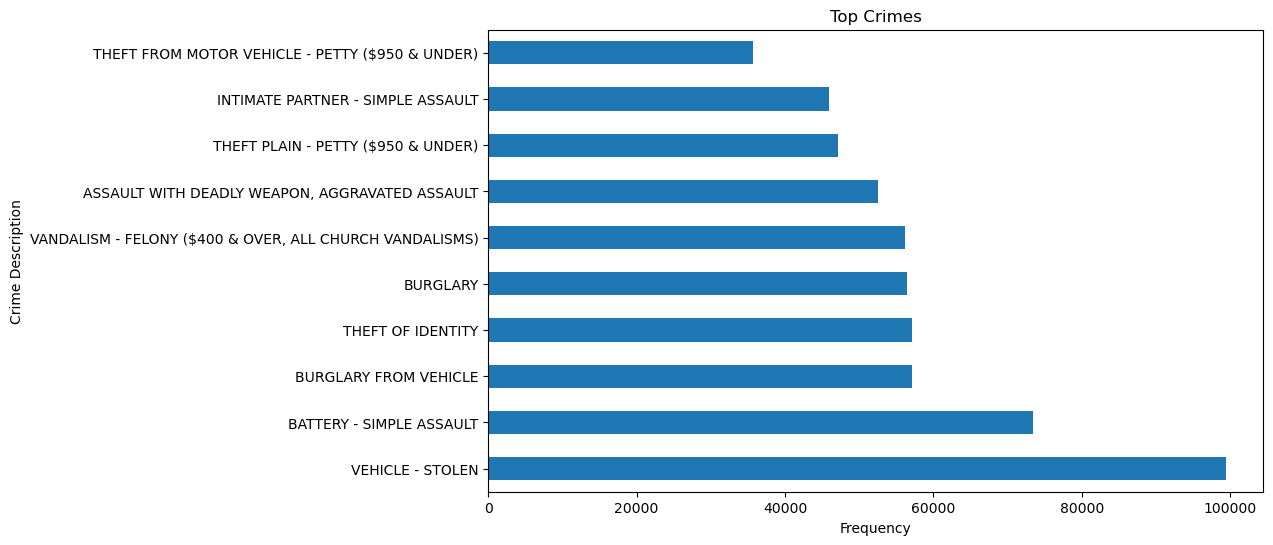

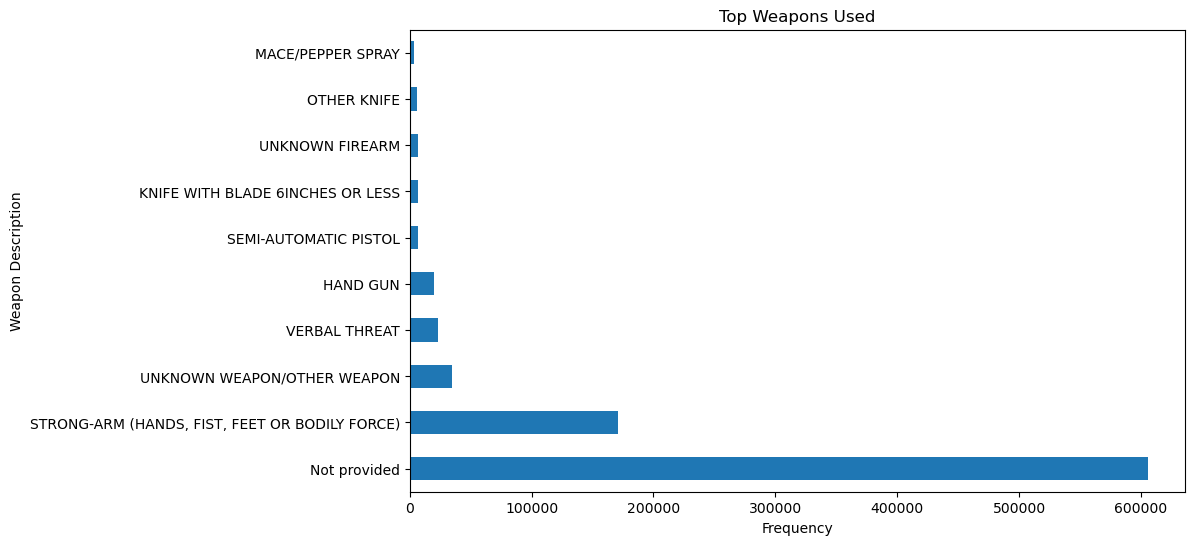

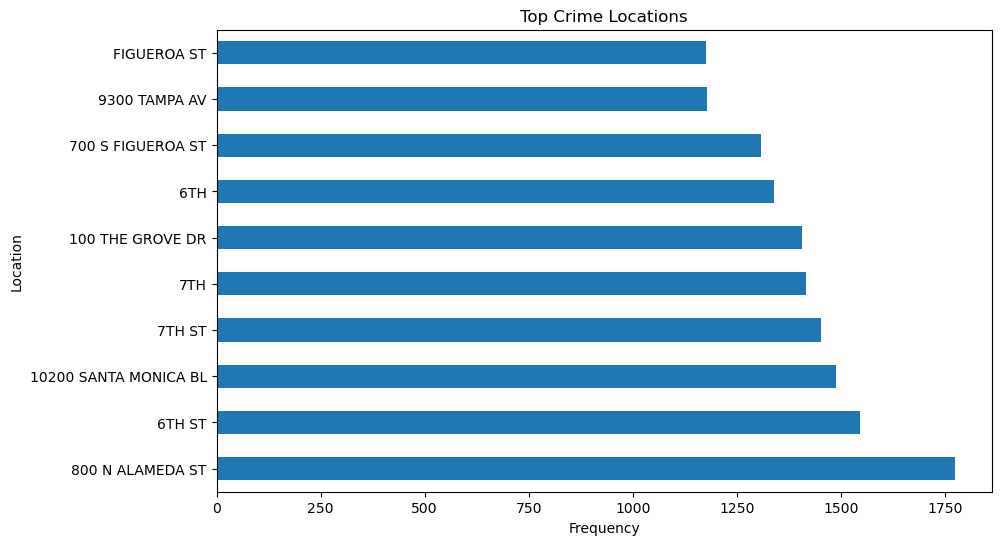

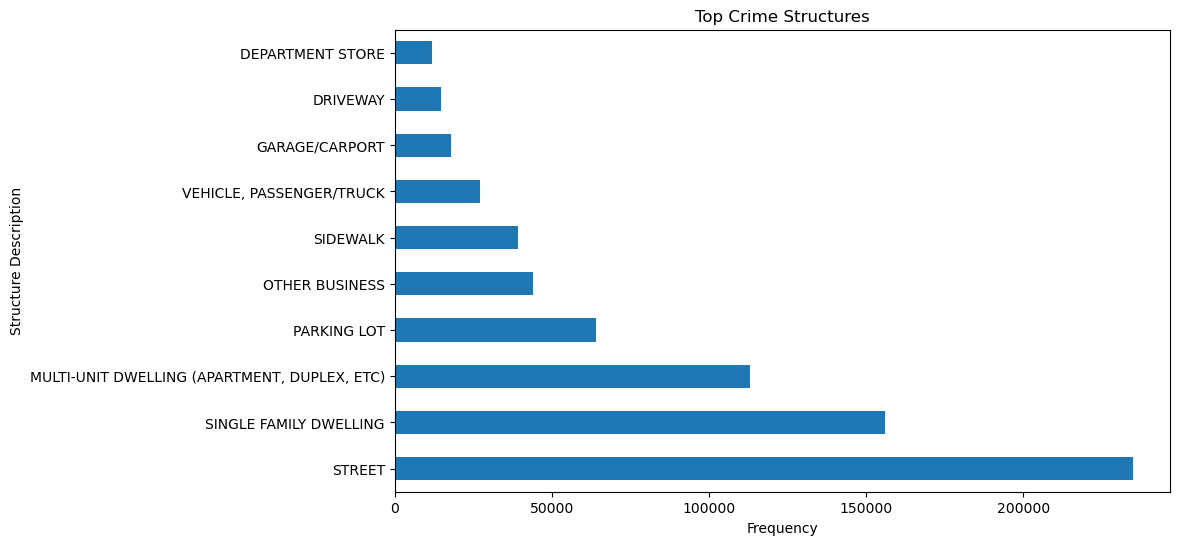

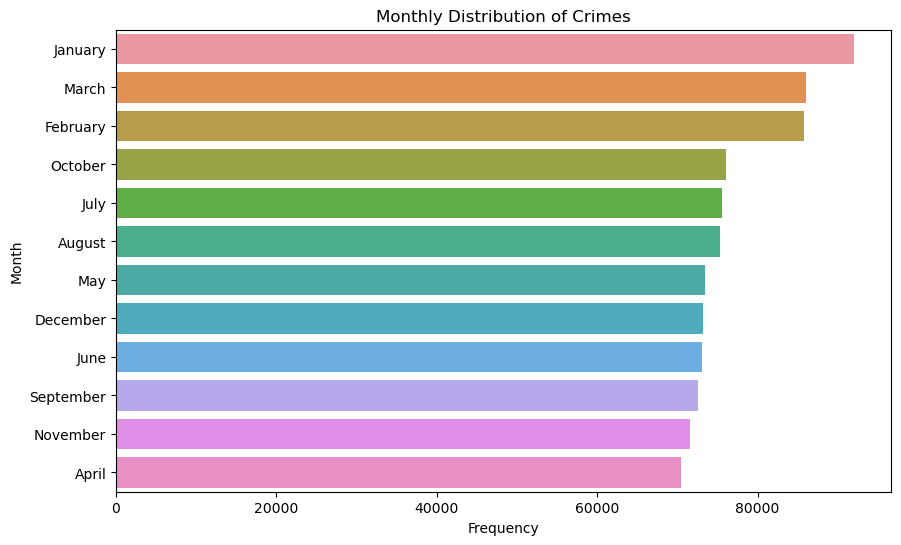

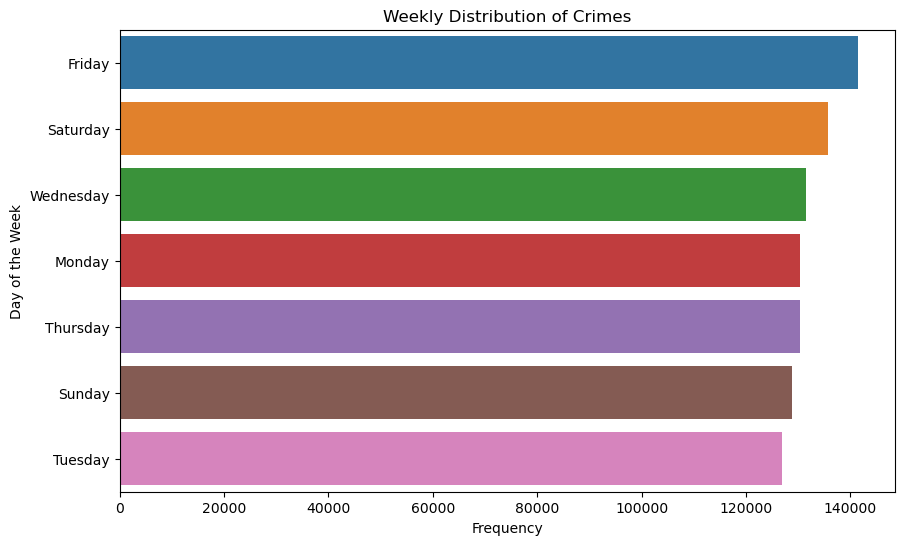

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA for top crimes
top_crimes = dataset['Crm Cd Desc'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_crimes.plot(kind='barh')  # Change kind to 'barh' for horizontal bar plot
plt.title('Top Crimes')
plt.xlabel('Frequency')
plt.ylabel('Crime Description')
plt.show()

# EDA for weapons used
top_weapons = dataset['Weapon Desc'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_weapons.plot(kind='barh')  # Change kind to 'barh' for horizontal bar plot
plt.title('Top Weapons Used')
plt.xlabel('Frequency')
plt.ylabel('Weapon Description')
plt.show()

# EDA for crime locations
top_locations = dataset['LOCATION'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_locations.plot(kind='barh')  # Change kind to 'barh' for horizontal bar plot
plt.title('Top Crime Locations')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.show()

# EDA for crime structure
top_structures = dataset['Premis Desc'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_structures.plot(kind='barh')  # Change kind to 'barh' for horizontal bar plot
plt.title('Top Crime Structures')
plt.xlabel('Frequency')
plt.ylabel('Structure Description')
plt.show()

# EDA for time of crime occurrence (monthly)
dataset['DATE OCC'] = pd.to_datetime(dataset['DATE OCC'])
crime_by_month = dataset['DATE OCC'].dt.month_name().value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(y=dataset['DATE OCC'].dt.month_name(), order=dataset['DATE OCC'].dt.month_name().value_counts().index)  # Change x to y for horizontal count plot
plt.title('Monthly Distribution of Crimes')
plt.xlabel('Frequency')
plt.ylabel('Month')
plt.show()

# EDA for time of crime occurrence (weekly)
crime_by_weekday = dataset['DATE OCC'].dt.day_name().value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(y=dataset['DATE OCC'].dt.day_name(), order=dataset['DATE OCC'].dt.day_name().value_counts().index)  # Change x to y for horizontal count plot
plt.title('Weekly Distribution of Crimes')
plt.xlabel('Frequency')
plt.ylabel('Day of the Week')
plt.show()


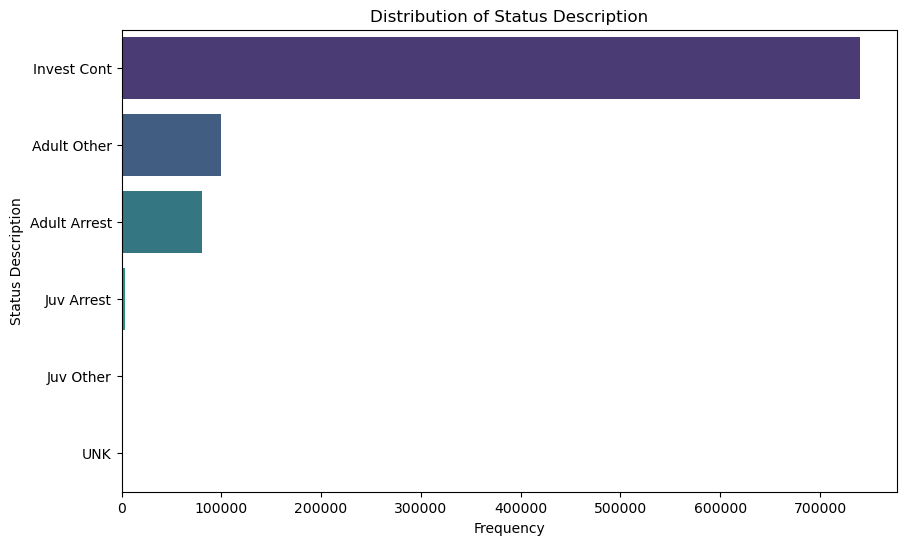

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get value counts for Status Desc
status_counts = dataset['Status Desc'].value_counts()

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.values, y=status_counts.index, palette='viridis')
plt.title('Distribution of Status Description')
plt.xlabel('Frequency')
plt.ylabel('Status Description')
plt.show()


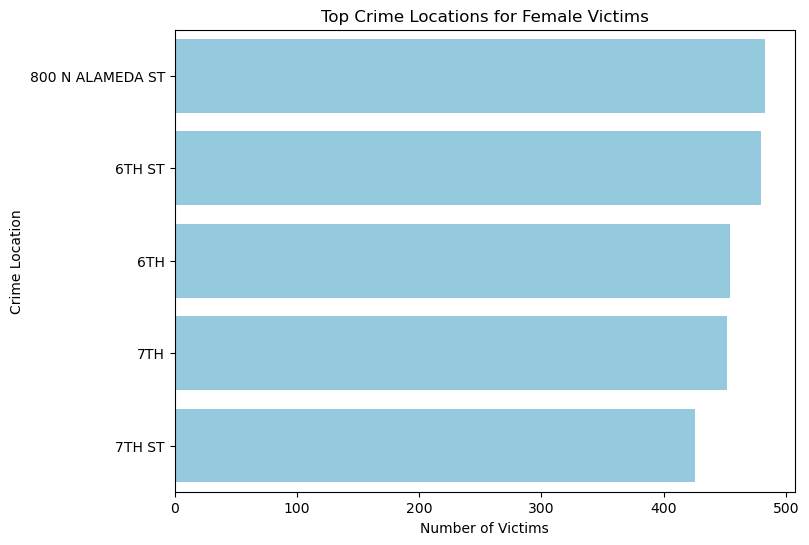

In [10]:
# Calculate the count of victims for each gender category in each crime location
victim_counts_by_location_gender = dataset.groupby(['LOCATION', 'Vict Sex']).size().unstack(fill_value=0)

# Determine the top crime locations for each gender category based on victim count
top_locations_female = victim_counts_by_location_gender['F'].nlargest(5)
top_locations_male = victim_counts_by_location_gender['M'].nlargest(5)
top_locations_unknown = victim_counts_by_location_gender['X'].nlargest(5)
top_locations_notprovided = victim_counts_by_location_gender['Not provided'].nlargest(5)

# Visualize the top crime locations for each gender category using plots
plt.figure(figsize=(8, 6))
sns.barplot(x=top_locations_female.values, y=top_locations_female.index, color='skyblue')
plt.title('Top Crime Locations for Female Victims')
plt.xlabel('Number of Victims')
plt.ylabel('Crime Location')
plt.show()